## **Visual Information Processing Lab**

# Perceptron




#### IRIS DATASET
[UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Iris)
#### Dataset Information


##### Classes:
1.  Iris Setosa
2.  Iris Versicolour
3. Iris Virginica

##### Attributes:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

#### Mouting 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


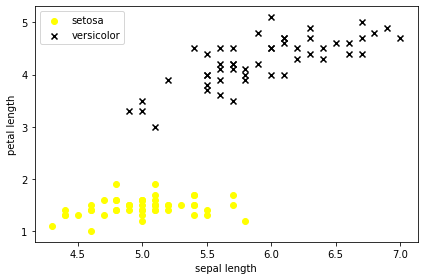

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor 
y = df.iloc[0:100, 4].values
#Labelling the data
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# ploting the data
plt.scatter(X[:50, 0], X[:50, 1],
            color='yellow', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='black', marker='x', label='versicolor')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

In [ ]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):  #Initialization of the learning rate and number of iterations
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):                      #Initialization of the weight and bias
        self.w_ = np.zeros(1 + X.shape[1])    #The error variable is initialized to zero 
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):      #Weight and bias updation by calulating the difference between the actual and the predicted value
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # The dot product betweeen the input * weight and adding the bias

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # The step activation

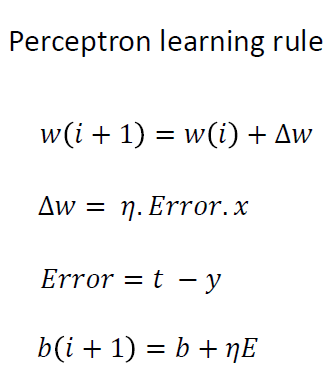

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/Machine Learning TA Lab December 2021/Reference Materials/I3.png', embed=True))

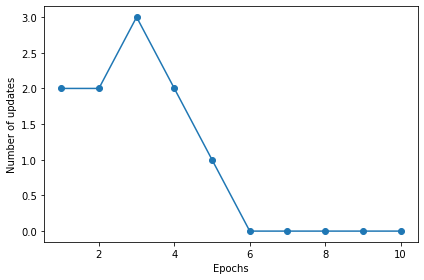

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


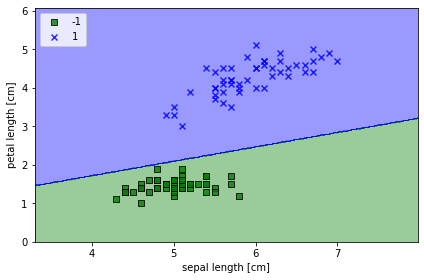

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()